# 3 Important pre-processing functions for MRI Scans.

I worked on image resolution and units conversion. Both have thier own advantages for future studies. But these two functions form a basic pre processing for application of many algorithms

By changing image resolution, It helps doctors to analyse the scan more clearly and accurately.

I had participated in "Data Science Bowl 2017" in Kaggle and the data is given to perform any analysis that could contribute for a change.

## FIRST

As the file format is DICOM and the data is huge I thought to show how each function works with 1 image as demo.
First we need to convert Dicom file format images into PNG 



Install all requirements with pip like
pip install -r requirements.txt

In requirements.txt we should have

numpy==1.14.1
pydicom==1.0.2
pypng==0.0.18

# Lets see function to convert DICOM Files into PNG.

In [ ]:
import mritopng
def convert_to_png(path1,path2):
    mritopng.convert_folder(path1, path2)

# Convert a whole folder recursively
convert_to_png('C:/Users/DTP/Desktop/DICOM/', 'C:/Users/DTP/Desktop/PNG/')

## SECOND

### Changing Resolution and Resizing MRI Images

Now, as we converted DICOM Images into PNG lets take one image and resize it for demo.

Let us see the complete function for resizing images in a folder.

In [ ]:
def resize_image(path,size):
    for i in dir:
        if os.path.isfile(path+item):
            image = Image.open(path+i)
            f, e = os.path.splitext(path+i)
            re_image = image.resize(size, Image.ANTIALIAS)
            re_image.save(f + ' resized.png', 'PNG', quality=90)

resize_image(path,size)

## Split Function and analyse
For Better understanding let's split the function and analyse what does the function does to the scans before and after the execution

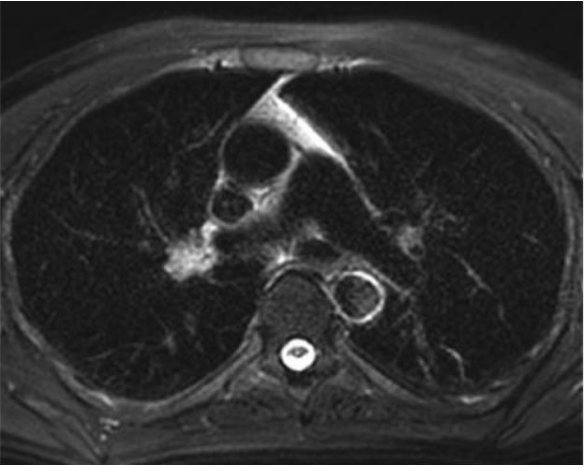

In [1]:
from os import listdir
from PIL import Image as PImage
from IPython.display import Image


path = "C:/Users/DTP/Desktop/MS Analytics/Quarter-3/SubQuarter-2/Python For Data Science/Scans/scan1.png"
scan=Image(path)
scan

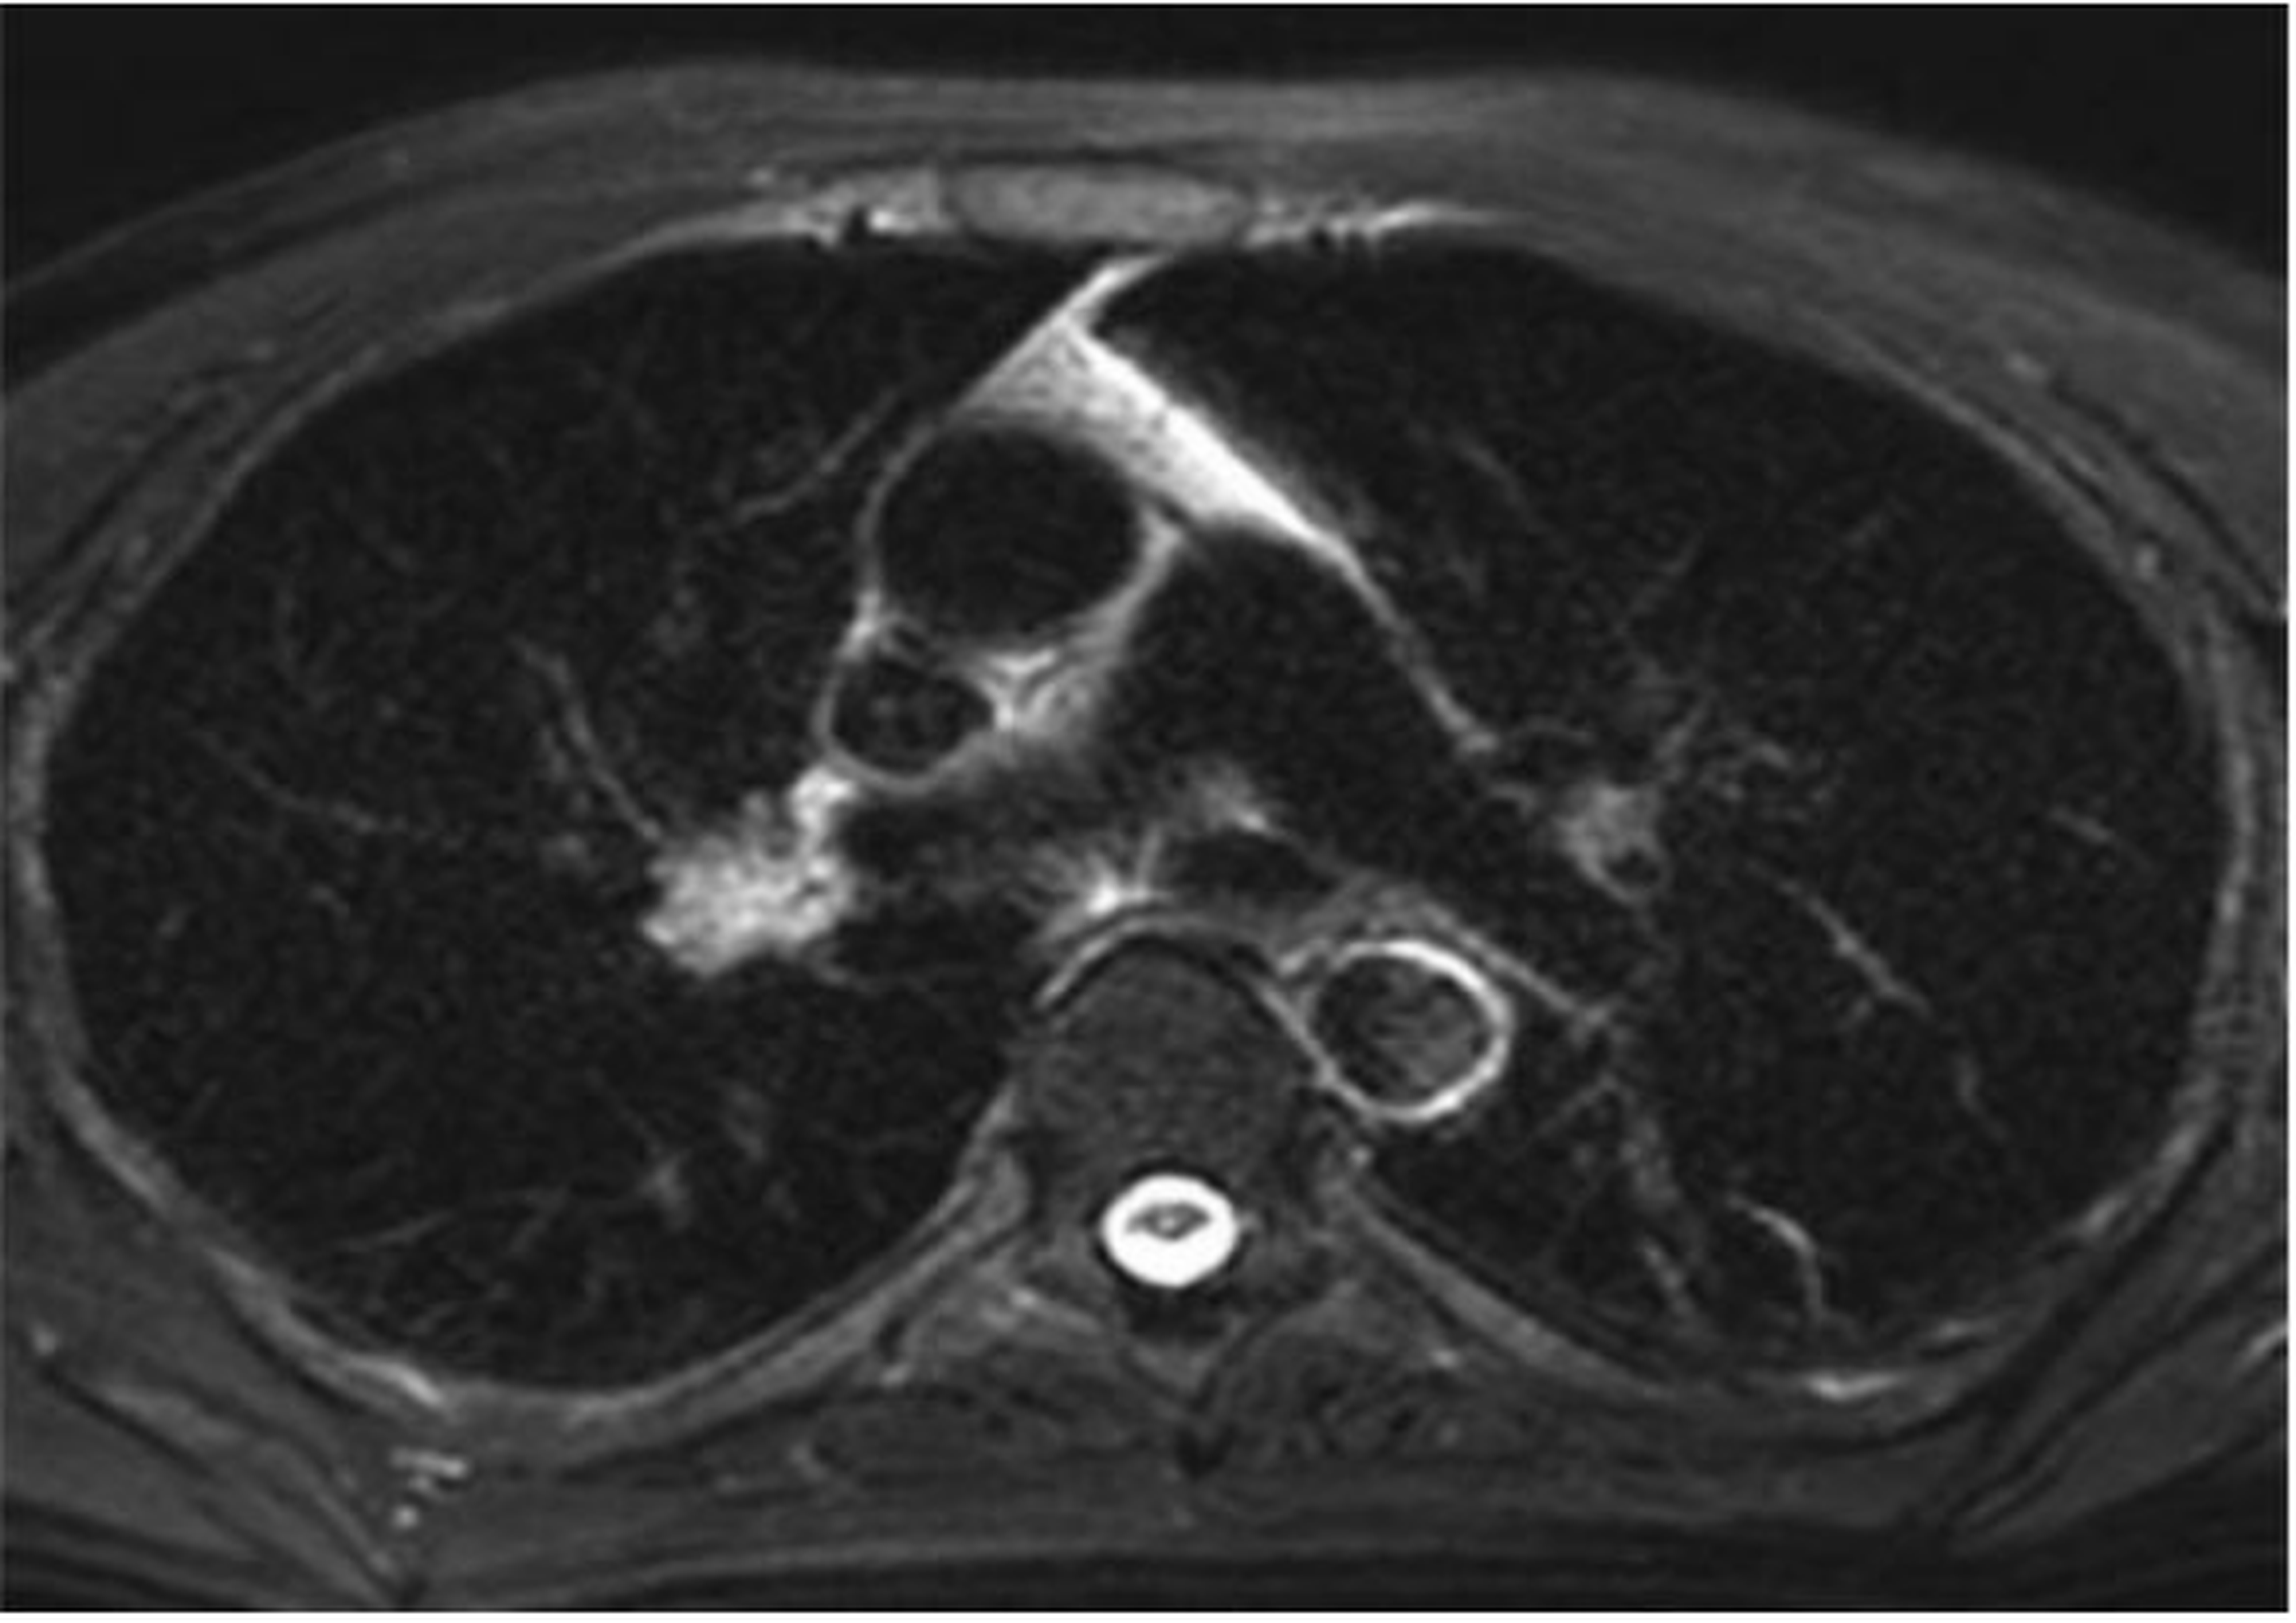

In [2]:
from os import listdir
from PIL import Image as PImage
from IPython.display import Image
from PIL import Image


path = "C:/Users/DTP/Desktop/MS Analytics/Quarter-3/SubQuarter-2/Python For Data Science/Scans/scan1.png"
scan=Image.open(path)

size = 7016, 4961
im = Image.open(path)
im_resized = im.resize(size, Image.ANTIALIAS)
#im_resized.save("my_image_resized.png", "PNG")
im_resized



## Importance
By changing image resolution, It helps doctors to analyse the scan more clearly and accurately.
Resizing image also helps many analysts in health care sector to assign borders and apply some deep learning algorithms to check the tumour presence

## THIRD

### Hounsfield Units


"The Hounsfield unit (HU) scale is a linear transformation of the original linear attenuation coefficient measurement in one in which the radiodensity of distilled water at standard pressure and temperature (STP) is defined as zero Hounsfield units (HU), while the radiodensity of air at STP is defined as -1000 HU. For a material X with linear attenuation coefficient μX, the corresponding HU value is therefore given by where is the linear attenuation coefficient of water."

The formula is:

HU = pixel_value * slope + intercept

Normally, these values are stored in the DICOM file itself. The tags are generally called the Rescale Slope and Rescale Intercept, and typically have values of 1 and -1024, respectively.

We can convert units of images in DICOM File into HU as it is really important in further applications like segmentation and applying many machine learning algorithms.

This is one of the important steps in pre-processing and helps in filtering unimportant substances from MRI like removing noice from the image.

In [ ]:
def scan_HU(path):
    ct_image = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    ct_image.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    try:
        ct_image_thickness = np.abs(ct_image[0].ImagePositionPatient[2] - ct_image[1].ImagePositionPatient[2])
    except:
        ct_image_thickness = np.abs(ct_image[0].SliceLocation - ct_image[1].SliceLocation)

    for i in ct_image:
        i.ct_Thickness = ct_image_thickness

    image = np.stack([i.pixel_array for i in ct_image])

    # Convert to int16  as values should always be low enough (<32k)
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0

    # Convert to Hounsfield units (HU)
    for n in range(len(ct_image)):

        intercept = ct_image[n].RescaleIntercept
        slope = ct_image[n].RescaleSlope

        if slope != 1:
            image[n] = slope * image[n].astype(np.float64)
            image[n] = image[n].astype(np.int16)

        image[n] += np.int16(intercept)

    return np.array(image, dtype=np.int16)

scan_HU('C:/Users/DTP/Desktop/DICOM/')

# THREE FUNCTIONS FOR IMPORTING, VISUALIZING, AND PREDICTING.

### After working on image resolution and Changing units for MRI Scans of Lung cancer patients, I got interested in understanding different parameters that influence lung cancer and different symptoms which can be observed.

I got a dataset from https://data.world/cancerdatahp/lung-cancer-data and tried to visualize different parameters influencing Cancer and write a function to predict the level of cancer.

# ONE

The importcsv is a simple function to import csv file from local system or online.
The histogram function can take the attribute as parameter and can give out the histogram of the particular attribute in dataframe.
This is very useful to know the peak and average values of different parameters.
For example, Lets take an attribute "Age". From the histogram we can say that most of the cancer patients are in age of 25 to 50 

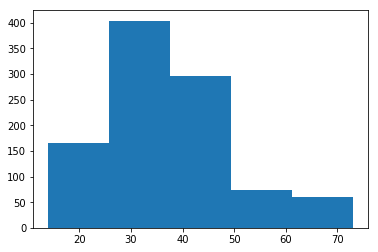

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
#from datetime import datetime, date, time, timedelta

#Function for importing CSV File
def importcsv(var):
    imported = pd.read_csv(var)
    return imported

# Importing Data Frame
df = importcsv("C:\\Users\\DTP\\Desktop\\cancer_info.csv")

#Function to plot Histogram
def histogram(attribute,bins):
    plt.hist(attribute, bins)
    
histogram(df.Age, bins=5)

In [6]:
df.head()

Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0         P1   33       1              2            4             5   
1        P10   17       1              3            1             5   
2       P100   35       1              4            5             6   
3      P1000   37       1              7            7             7   
4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

    ...    Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0   ...          3            4                    2         2   
1   ...          1            3                    7         8   
2   ...          8            7                    9         2   
3   ...          4            2                    3         1   
4   ...          3            2                    4         1   

   Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  Dry Cough  \
0                      3                         1              2          3   
1                      6                         2              1          7   
2                      1                         4              6          7   
3                      4                         5              6          7   
4                      4                         2              4          2   

   Snoring   Level  
0        4     Low  
1        2  Medium  
2        2    High  
3        5    High  
4        3    High  

[5 rows x 25 columns]

# TWO

The Below function outputs Correlation Plot which helps analysts to understand the correlation between different attributes. In the following dataset we can understand the correlation between different symptoms and helps us to relate what all side effect might one symptom lead to.

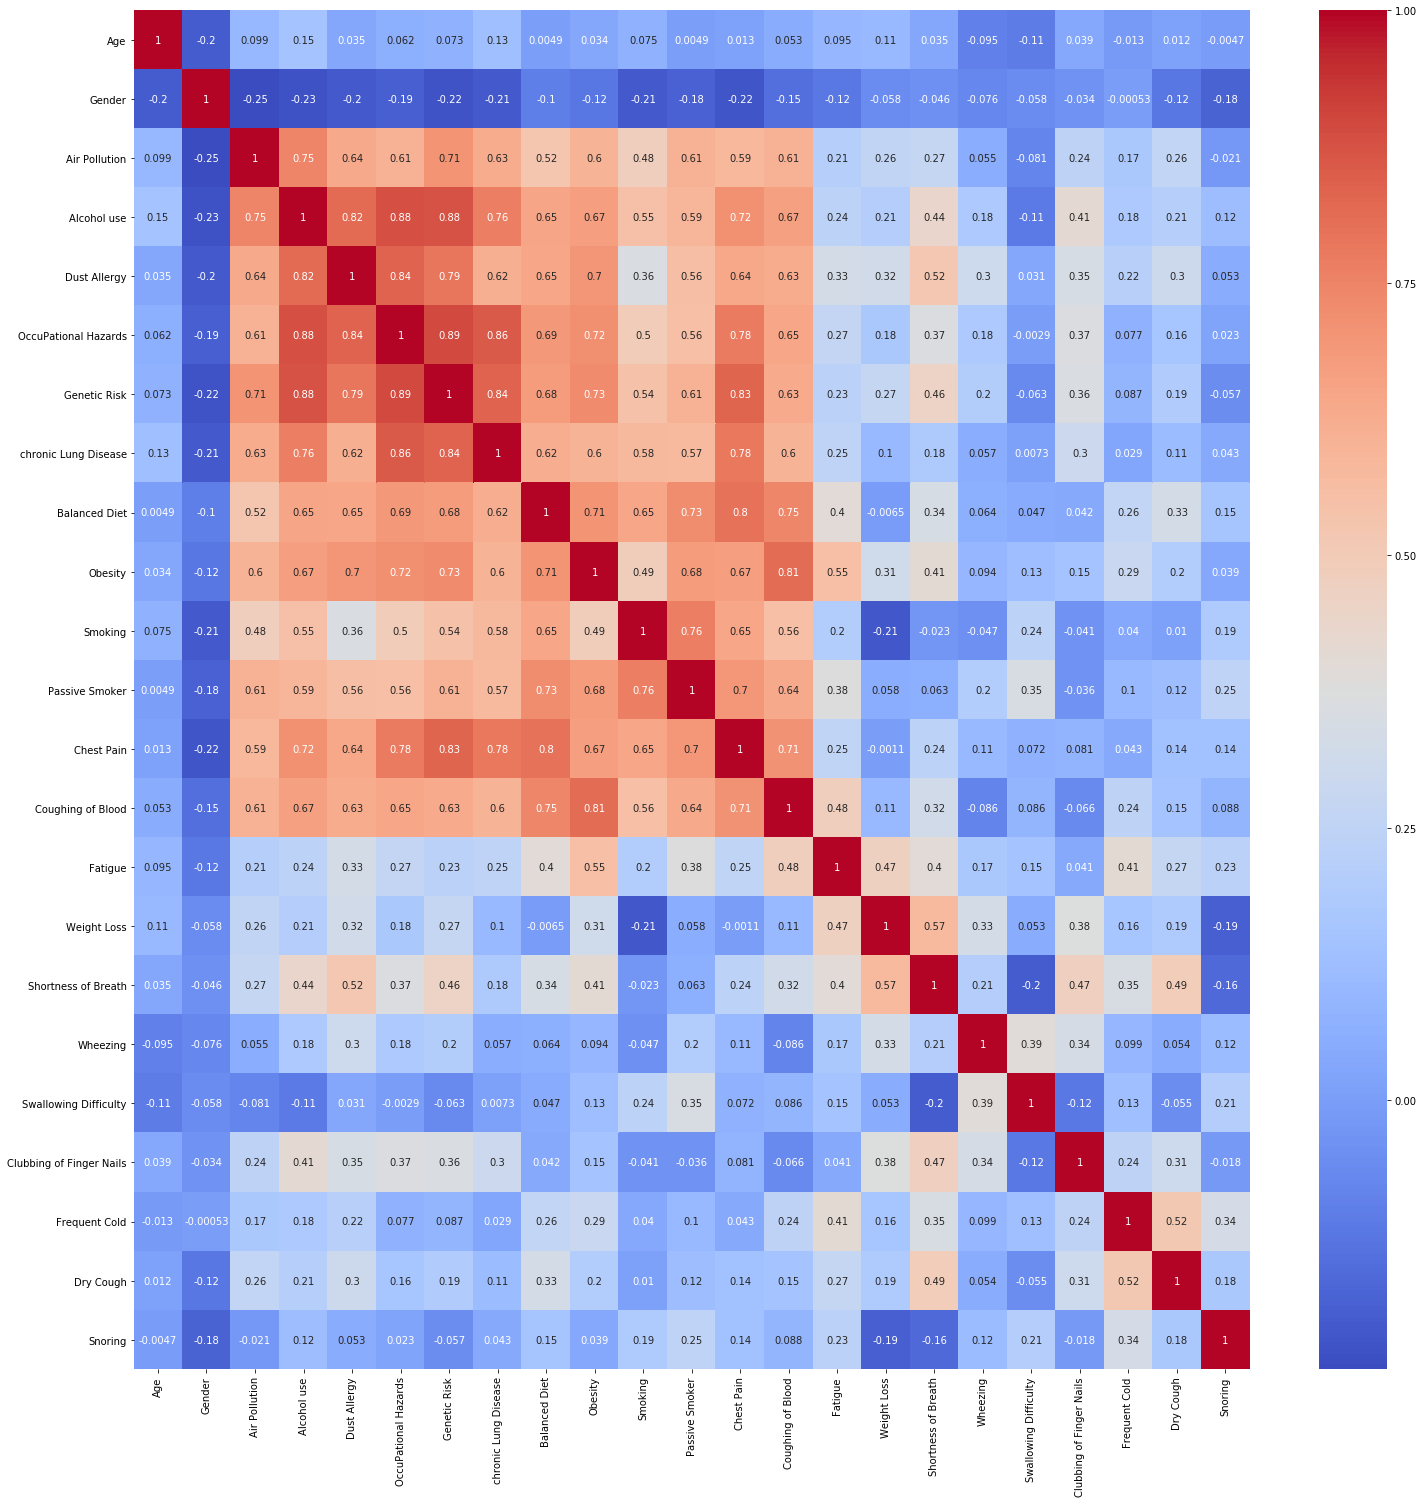

In [8]:


import seaborn as sns 
df_list = list(df.columns[1:24])

#Correlation Plot Function
def corr_plot(list_of_df):
    corr = df[list_of_df].corr()
    #plotting the layout for map
    plt.figure(figsize=(25,25))
    sns.heatmap(corr, cmap='coolwarm', xticklabels = list_of_df,  yticklabels = list_of_df, annot=True)
    
corr_plot(df_list)

# THREE
The below Random Forest function classifies the data given in all other collumns except Patient Id and can predict the level of cancer in patient. This is a very useful function to understand the level of cancer a patient is in by looking at his symptoms.

Below Confusion Matrix can cleary say the no. of True Positives and False Positives. As per dataset there are three levels of cancer mentioned (Low, Medium, High). So we could see 3*3 Matrix

In [7]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Importing the dataset
df = pd.read_csv("C:\\Users\\DTP\\Desktop\\cancer_info.csv")

#Function for Random Forest Classification
def RandomForest(dataset):
    X = dataset.iloc[:, [1, 23]].values
    y = dataset.iloc[:, 24].values

    # Splitting the dataset as Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    # Feature Scaling
    std_scaler = StandardScaler()
    X_train = std_scaler.fit_transform(X_train)
    X_test = std_scaler.transform(X_test)

    # Classifying Random Forest to the Training set
    classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
    classifier.fit(X_train, y_train)

    # Predicting results for test set
    y_pred = classifier.predict(X_test)

    # Making the Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    
    return conf_mat

RandomForest(df)

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[70, 11,  4],
       [12, 41,  6],
       [ 5,  2, 49]], dtype=int64)